# IML Assignment 1

## Name: Nazgul


## Mail: n.salikhova@innopolis.university


## Group: B22-AAI-02

## Task 1

### 3.1. Linear Regression
#### Data reading

In [417]:
import pandas as pd

# Data loading
df = pd.read_csv('train_1.csv')

#### Train\validation splitting

In [418]:
from sklearn.model_selection import train_test_split

# Extracting data from dataframe
X = df.iloc[:, 1:-1].values
y = df.iloc[:, df.shape[1] - 1].values

# Data splitting & shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

#### Linear regression model fitting

In [419]:
from sklearn.linear_model import LinearRegression

# Model declaration
linear_model = LinearRegression()
# Model training
linear_model.fit(X_train, y_train)

# Prediction by model on the validation dataframe
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


MSE(Mean Squared Error): 4981.420462673979
RMSE(Root Mean Squared Error): 70.57917867667474
MAE(Mean Absolute Error): 59.68387524655598
R2: 0.8878644733172234


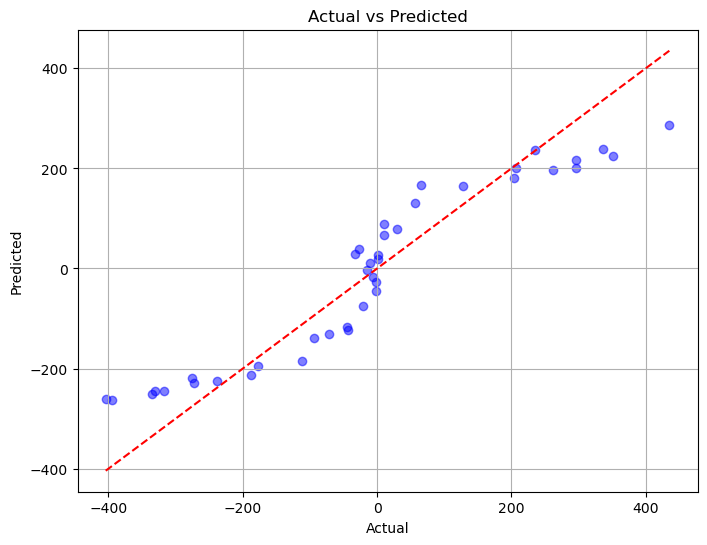

In [420]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# This function returns the metrics of a model
# @param y_actual - result predicted by a model
# @param y_pred - proper and real result
def print_metrics(y_actual, y_pred):
    print('MSE(Mean Squared Error):', metrics.mean_squared_error(y_actual, y_pred))
    print('RMSE(Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print('MAE(Mean Absolute Error):', metrics.mean_absolute_error(y_actual, y_pred))
    print('R2:', metrics.r2_score(y_actual, y_pred))

print_metrics(y_test, y_pred_lr)

# Plotting y_actual vs y_pred_lr
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [421]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [422]:
# Creating polynom transformer with degree 2
polynomial_features = PolynomialFeatures(degree=2)

linear_regression = LinearRegression()

# Creating a polynomial regression pipeline
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

#### Tuning the degree hyper-parameter using GridSearch

In [423]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    "polynomial_features__degree": range(2, 6)
}

# Declaration of a GridSearch to find the best parameters for linear regression
search = GridSearchCV(pipeline, param_grid, cv=8,
            scoring='neg_mean_squared_error')

# Training the GridSearch
search.fit(X_train, y_train)

# Find the optimum degrees
print(f"Best parameter: {search.best_params_}" )

# Print the GridSearchCV score
print(f"Search score: {search.best_score_}")

# Predict on the test set using the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)


Best parameter: {'polynomial_features__degree': 4}
Search score: -0.41105947663346365


In [424]:
print_metrics(y_test, y_pred)

MSE(Mean Squared Error): 0.23733343833011755
RMSE(Root Mean Squared Error): 0.48716879860076995
MAE(Mean Absolute Error): 0.3600557096751341
R2: 0.9999946574455407


#### Save the model

In [425]:
import pickle 

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model1.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

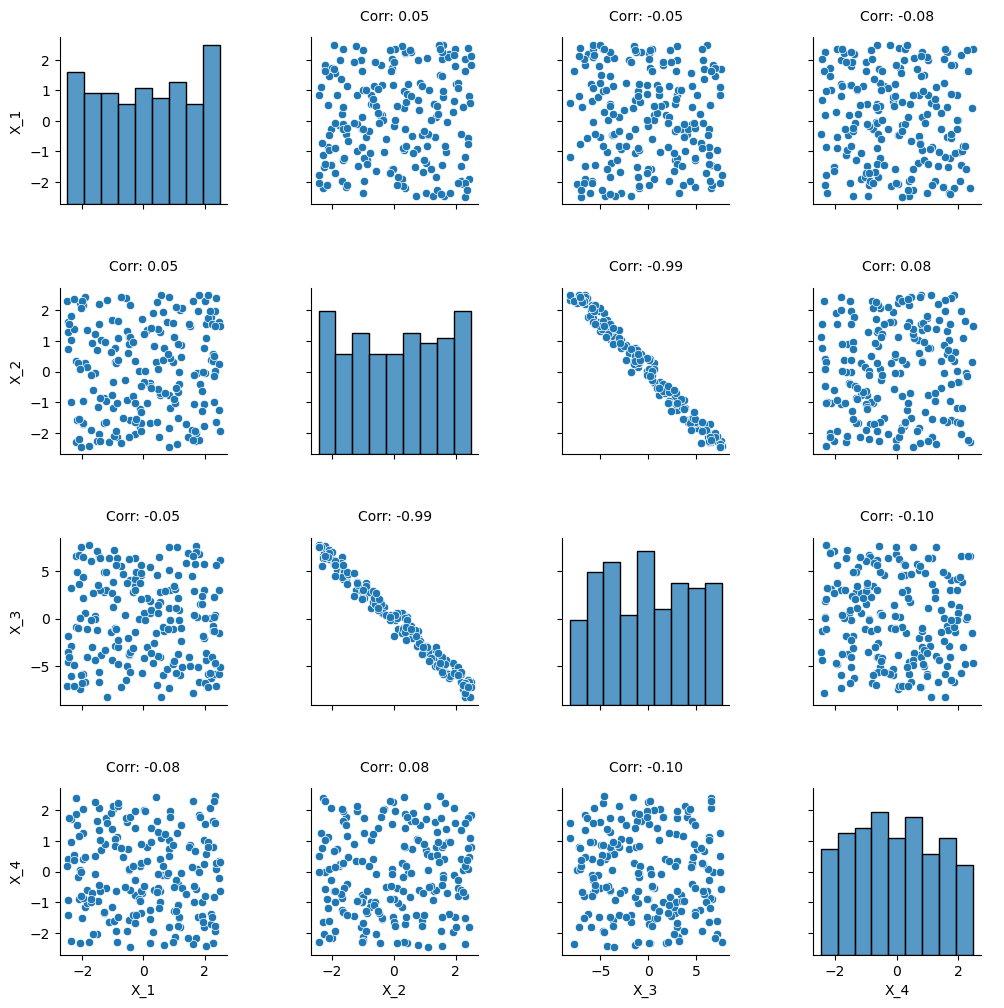

In [426]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing df
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_new = df.iloc[:, 1:-1]

# Plotting correlation diagram using PairGrid
g = sns.PairGrid(df_new)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Adding correlation values to the diagram
def annotate_corr(x, y, **kwargs):
    corr_coef = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"Corr: {corr_coef:.2f}", xy=(.5, 1.1), xycoords=ax.transAxes, ha='center')

g.map_offdiag(annotate_corr)
g.fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

Based on the correlation results, the features X_2 and X_3 are identified as the most correlated features because their correlation coefficient is -0.99 and it indicates a strong negative linear relationship between the two features.

## Task 2

### Data processing
#### Loading the dataset

In [427]:
import pandas as pd
# Data loading
df = pd.read_csv('pokemon_modified.csv')

#### Exploring the dataset  and removing 2 redundant features

In [428]:
# Removing redundant features:
# 'Name' and 'Classification' because they have only unique values
# and do not provide any useful information for predictive modeling,
# and don't exhibit any discernible patterns  with the target variable.
redundant_features = ['name', 'classification']
df.drop(columns=redundant_features, inplace=True)

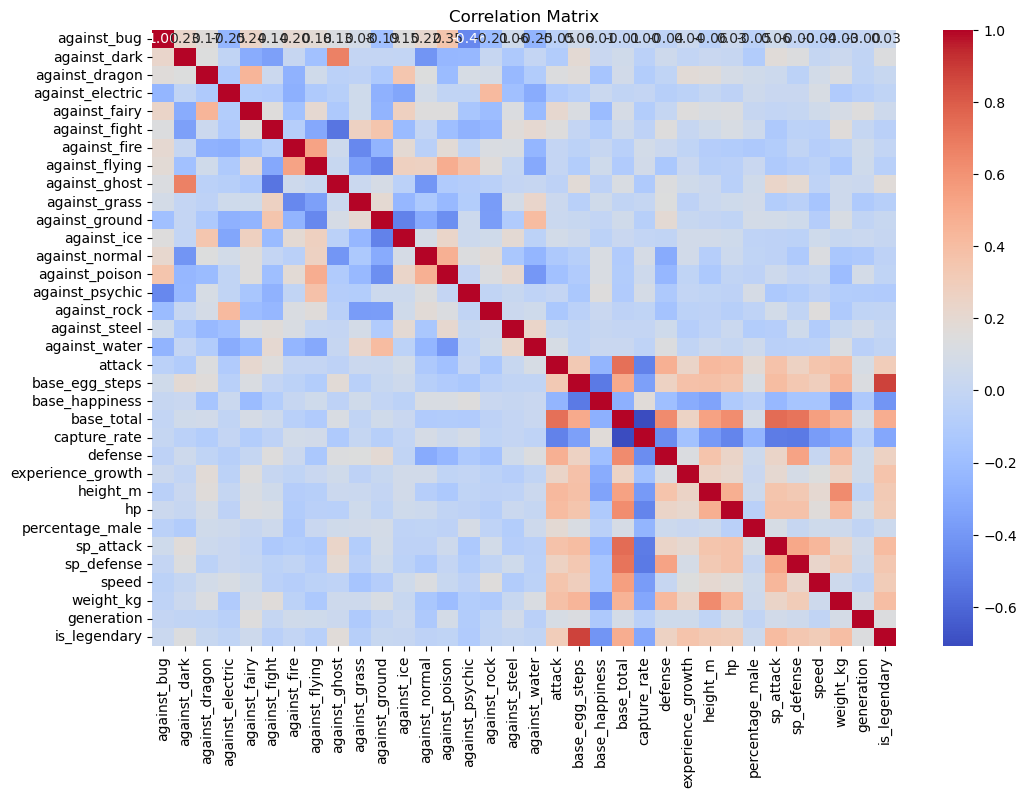

In [429]:
import seaborn as sns
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'float64', 'bool']).columns

# Calculate correlation matrix for numeric columns
corr_matrix = df[numeric_columns].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()


#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [430]:
from sklearn.model_selection import train_test_split

# Extracting data from dataframe
X = df.iloc[:, :-1].values
y = df["is_legendary"].values

# Splitting the dataset into train/test with a ratio of 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Check if the dataset is balanced or not and comment on it

In [431]:
# Calculate class proportions in the training set
train_class_proportions = np.bincount(y_train) / len(y_train)

# Calculate class proportions in the testing set
test_class_proportions = np.bincount(y_test) / len(y_test)

print("Class proportions in training set:", train_class_proportions)
print("Class proportions in testing set:", test_class_proportions)

Class proportions in training set: [0.9125 0.0875]
Class proportions in testing set: [0.91304348 0.08695652]


Since the proportions of both dataframes are very similar between the training and testing sets, the dataset can be considered balanced. This indicates that the stratified train-test split was successful in maintaining the class distribution in both sets.

#### Checking for missing values

In [432]:
from sklearn.impute import SimpleImputer

# Checking for missing values
missing_values = df.isnull().sum()

# Print the columns with missing values
print("Columns with missing values:")
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")


Columns with missing values:
height_m: 20 missing values
percentage_male: 98 missing values
weight_kg: 20 missing values


#### Impute the missing values

In [433]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

# Applying the imputer on training set
imputer.fit(X_train)

# Applying the imputer to both training and testing data
X_train = pd.DataFrame(imputer.transform(X_train), columns=df.columns[:-1])
X_test = pd.DataFrame(imputer.transform(X_test), columns=df.columns[:-1])

#### Double check that there are no missing values

In [434]:
# Check for missing values in the training set after imputation
missing_values_train = X_train.isnull().sum()
print("Missing values in training set after imputation:")
if missing_values_train.any():
    print(missing_values_train[missing_values_train > 0])
else:
    print("There are no missing values.\n")

# Check for missing values in the testing set after imputation
missing_values_test = X_test.isnull().sum()
print("Missing values in testing set after imputation:")
if missing_values_test.any():
    print(missing_values_test[missing_values_test > 0])
else:
    print("There are no missing values.")

Missing values in training set after imputation:
There are no missing values.

Missing values in testing set after imputation:
There are no missing values.


#### Encode categorically

In [435]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fitting the encoder on the training data
encoder.fit(X_train[['type1']])

# Transform the "type1" column in both training and testing data
X_train_encoded = encoder.transform(X_train[['type1']])
X_test_encoded = encoder.transform(X_test[['type1']])

# Convert the encoded arrays into DataFrames and concatenate with the original DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['type1']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['type1']))

# Concatenate the encoded features with the original training and testing data
X_train = pd.concat([X_train.drop(columns=['type1']), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['type1']), X_test_encoded_df], axis=1)

/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Scale the data

In [436]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

# Applying the scaler on both train and test features
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Correlation Matrix

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

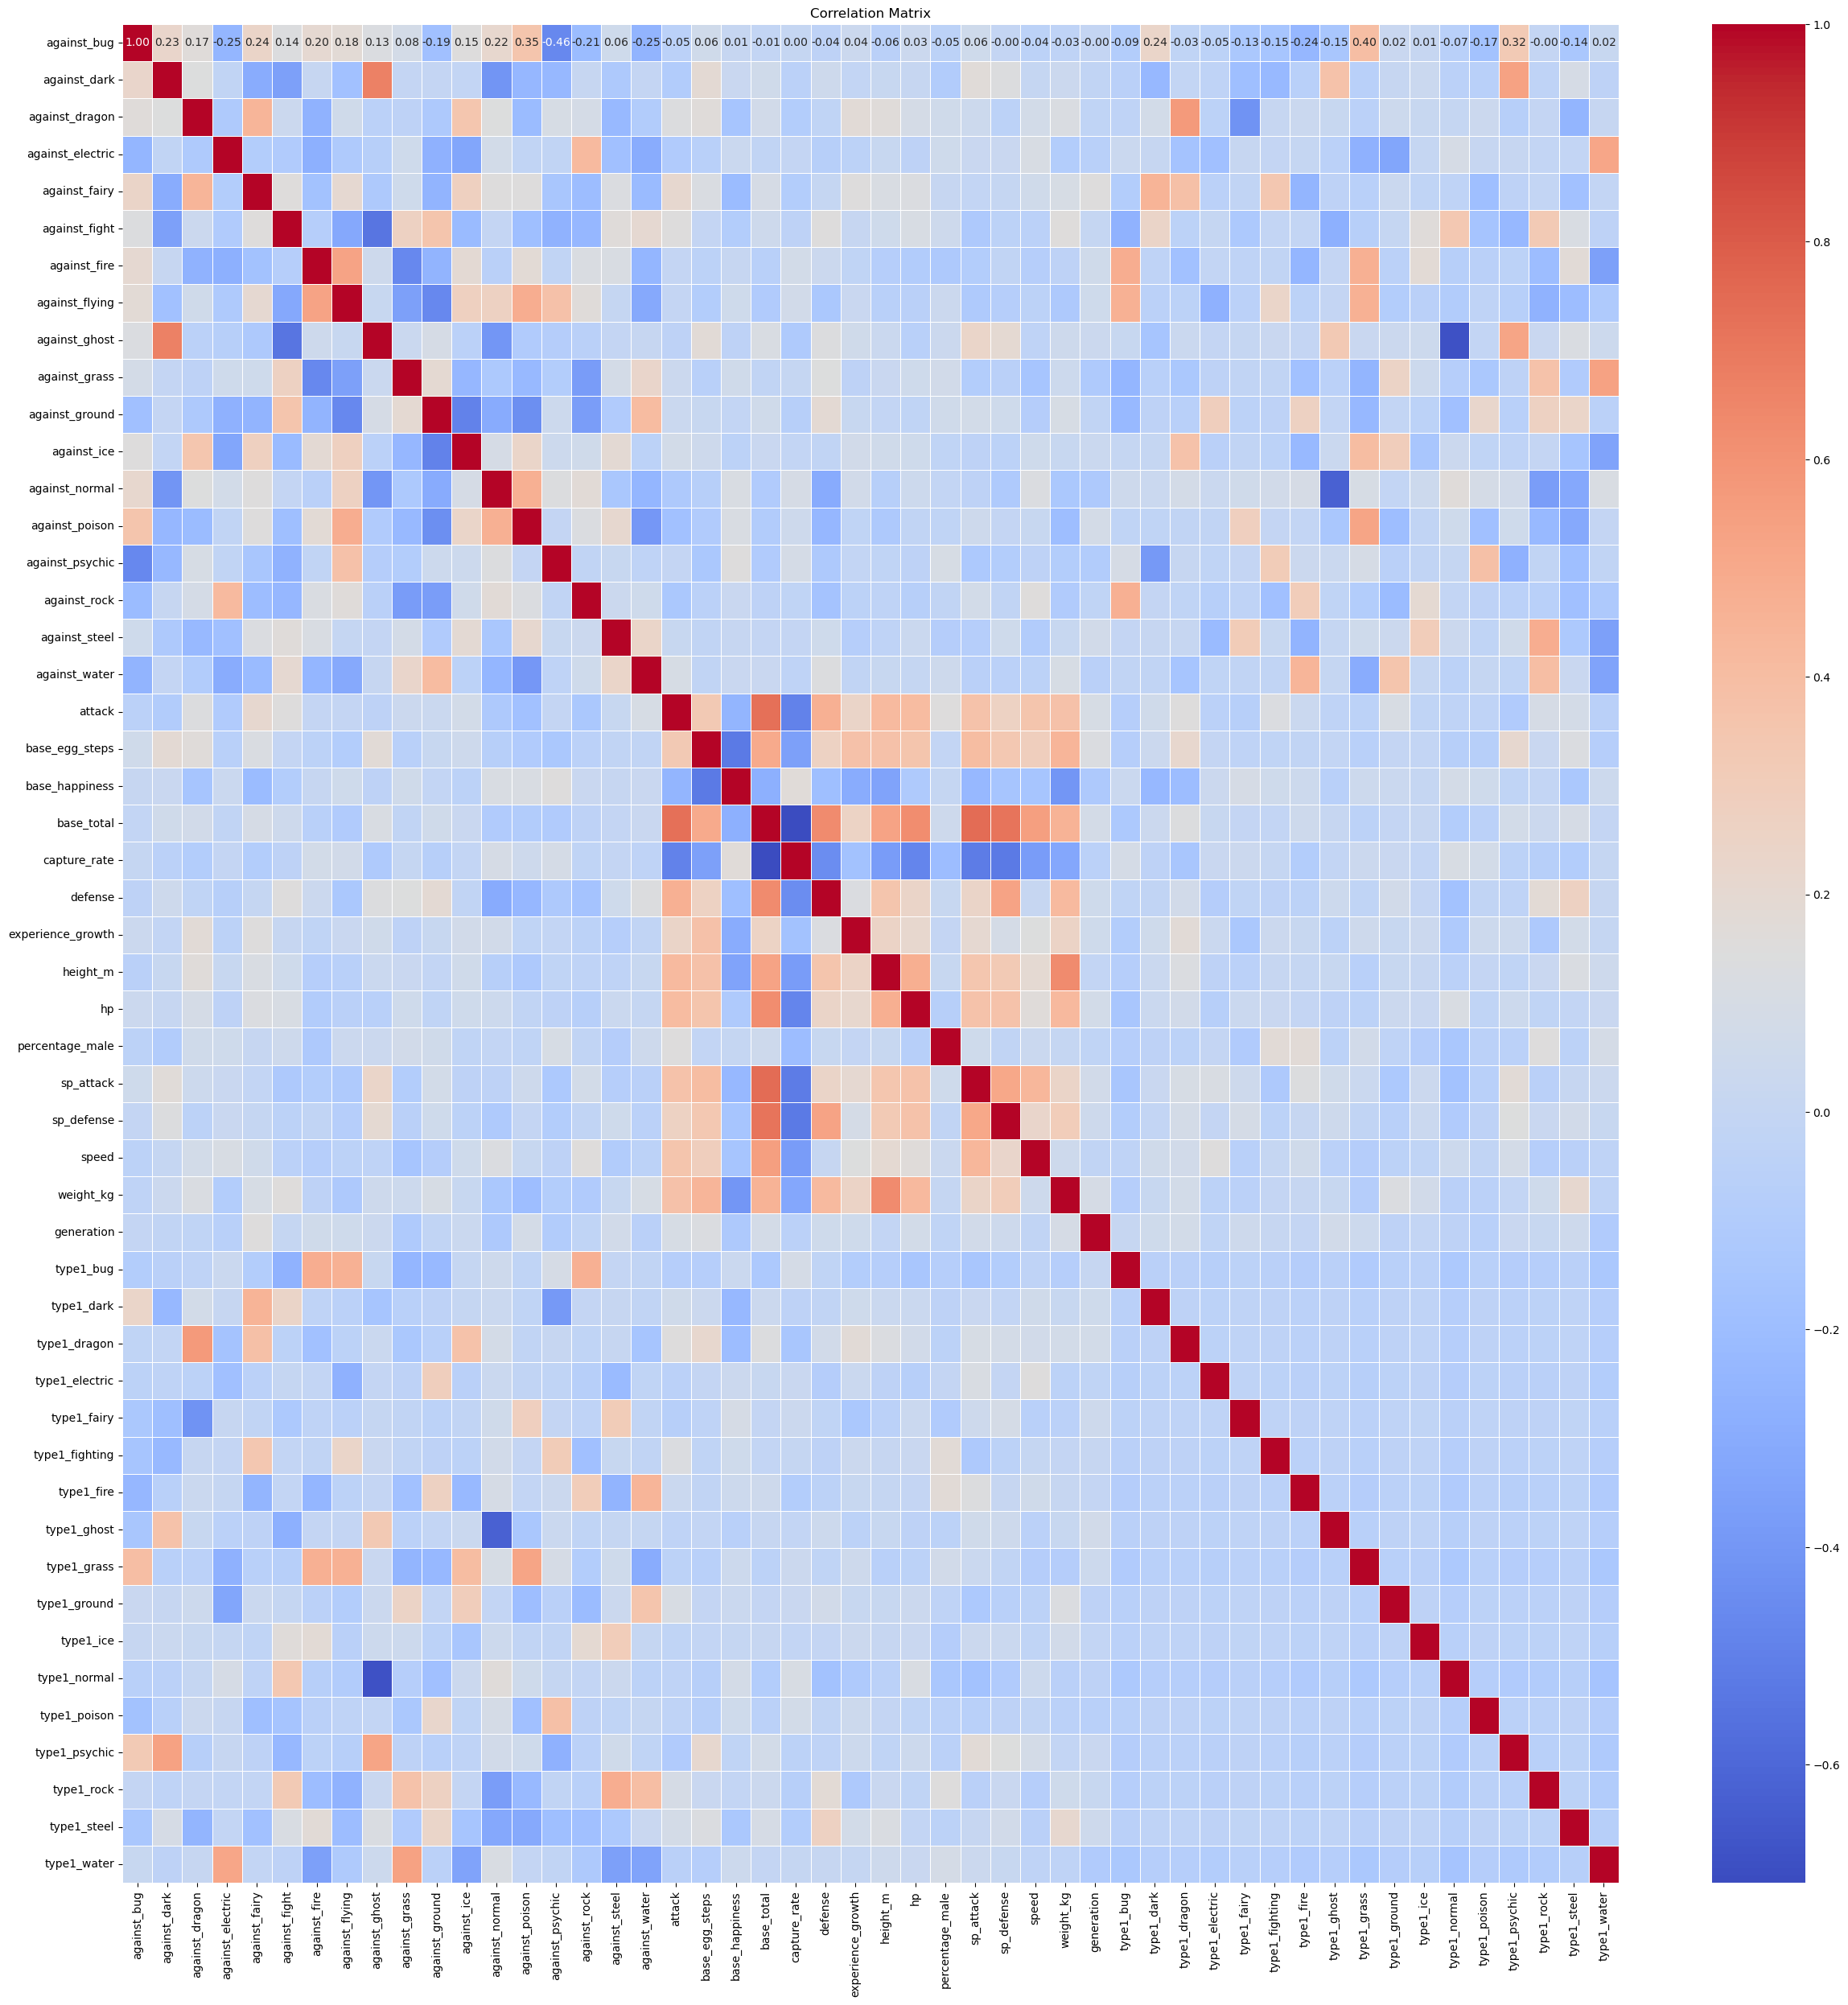

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

# Concatenate X_train and X_test to create a single dataset
X_combined = pd.concat([X_train, X_test])

# Calculate the correlation matrix
correlation_matrix = X_combined.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

There are higly correlated features: 'capture_rate' and 'base_total' and a few a bit correlated. I decided to not preprocess data because the number of features is much more bigger than number of correlated feature, i don't think that they will affect on model result.

### Model fitting and Comparison

#### Tuning LR model

In [438]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# This function returns the metrics of a model
# @param y_actual - result predicted by a model
# @param y_pred - proper and real result
def print_clf_metrics(y_actual, y_pred ):
    print('Accuracy:', accuracy_score(y_actual, y_pred))
    print('Precision:', precision_score(y_actual, y_pred))
    print('Recall:', recall_score(y_actual, y_pred))
    print('F1 Score:', f1_score(y_actual, y_pred))

In [439]:
# Specify parameters for GridSearchCV
parameters = {
    'penalty': ['l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg'],
}

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare logistic regression inside GridSearchCV
lr_clf_gs = GridSearchCV(LogisticRegression(max_iter=1000), parameters, scoring='f1', cv=5)
lr_clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'], 'solver': ['newton-cg']},
             scoring='f1')

In [441]:
print("Tuned Hyperparameters:", lr_clf_gs.best_params_)
print("Accuracy:", lr_clf_gs.best_score_)

Tuned Hyperparameters: {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.9339047619047619


#### Construct a LR with the best params and Evaluate the LR with the best params

In [442]:
from sklearn.linear_model import LogisticRegression

# Declaration of Logistic regression and training data
lr_clf = LogisticRegression(**lr_clf_gs.best_params_, random_state=42)
lr_clf.fit(X_train, y_train)
lr_y_pred = lr_clf.predict(X_test)

In [443]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [444]:
# Retrieve the coefficients of the logistic regression model
coefficients = lr_clf.coef_[0]

coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the coefficients
sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the top 5 most influencing features
print("Top 5 most influencing features:")
print(sorted_coefficients.head(5))

# Print the top 5 ignored features
print("\nTop 5 ignored features:")
print(sorted_coefficients.tail(5))

Top 5 most influencing features:
              Feature  Coefficient
19     base_egg_steps    14.069685
24  experience_growth     8.927741
21         base_total     6.665520
30              speed     6.197014
23            defense     4.772561

Top 5 ignored features:
           Feature  Coefficient
5    against_fight    -4.146161
2   against_dragon    -4.325422
25        height_m    -5.409146
44    type1_normal    -9.413216
22    capture_rate    -9.647303


#### Tuning KNN model

In [445]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

# Declare and train knn inside GridSearchCV
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), parameters, scoring='accuracy', cv=5)

# Fit GridSearchCV to the data
X_knn, y_knn = np.ascontiguousarray(X_train), y_train
knn_clf_gs.fit(X_knn, y_knn)

print("Tuned Hyperparameters:", knn_clf_gs.best_params_)
print("Accuracy:", knn_clf_gs.best_score_)

Tuned Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.946875


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [446]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing KNeighborsClassifier with best hyperparameters
knn_clf = KNeighborsClassifier(**knn_clf_gs.best_params_)

# Data training
knn_clf.fit(np.ascontiguousarray(X_train), y_train)

# Data prediction
knn_y_pred = knn_clf.predict(np.ascontiguousarray(X_test))

print_clf_metrics(y_test, knn_y_pred)


Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.7142857142857143
F1 Score: 0.8333333333333333


#### Fitting GNB to the data and evaluating on the test dataset

In [447]:
from sklearn.naive_bayes import GaussianNB

# Declaration and training GaussianNB
gauss_nb_clf = GaussianNB()
gauss_nb_clf.fit(X_train, y_train)
gauss_y_pred = gauss_nb_clf.predict(X_test)

print_clf_metrics(y_test, gauss_y_pred)

Accuracy: 0.9316770186335404
Precision: 0.56
Recall: 1.0
F1 Score: 0.717948717948718


#### Which metric is most appropriate for this task and why?

The most appropriate metric for this imbalanced(The number of non-legendary pokemons is much lower than legendary ones) classification task is likely Recall because it measures the ability of the model to correctly identify the legendary pokemon that is the main goal of the task.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [448]:
# TODO Write your code here
from sklearn.metrics import classification_report

# Calculate classification report for the tuned model
lr_model_report = classification_report(y_test, lr_y_pred)

# Calculate classification report for KNN
knn_report = classification_report(y_test, knn_y_pred)

# Calculate classification report for Gaussian Naive Bayes
gauss_nb_report = classification_report(y_test, gauss_y_pred)

print("\nClassification Report for the LR Model:")
print(lr_model_report)
print("Classification Report for K-Nearest Neighbors:")
print(knn_report)
print("\nClassification Report for Gaussian Naive Bayes:")
print(gauss_nb_report)



Classification Report for the LR Model:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       0.93      1.00      0.97        14

    accuracy                           0.99       161
   macro avg       0.97      1.00      0.98       161
weighted avg       0.99      0.99      0.99       161

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       147
           1       1.00      0.71      0.83        14

    accuracy                           0.98       161
   macro avg       0.99      0.86      0.91       161
weighted avg       0.98      0.98      0.97       161


Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       147
           1       0.56      1.00      0.72        14

    accuracy                           0.93  

After comparing three classifiers I found out that:
- All three models perform relatively well in terms of accuracy.
- Logistic Regression and K-Nearest Neighbors have a low false positive rate. Gaussian Naive Bayes has a higher false positive rate.(precision)
- Logistic Regression and Gaussian Naive Bayes achieve perfect recall scores.K-Nearest Neighbors has a lower recall score.
- Logistic Regression has the highest F1-score for Class 1, followed by Gaussian Naive Bayes and K-Nearest Neighbors.

As a result, Logistic Regression appears to be the best model for this task.

## 5. Bonus Task

#### Loading the Dataset

In [450]:
import pandas as pd

# Data loading
train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

In [451]:
# Split the train data
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

# Split the test data
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']
print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


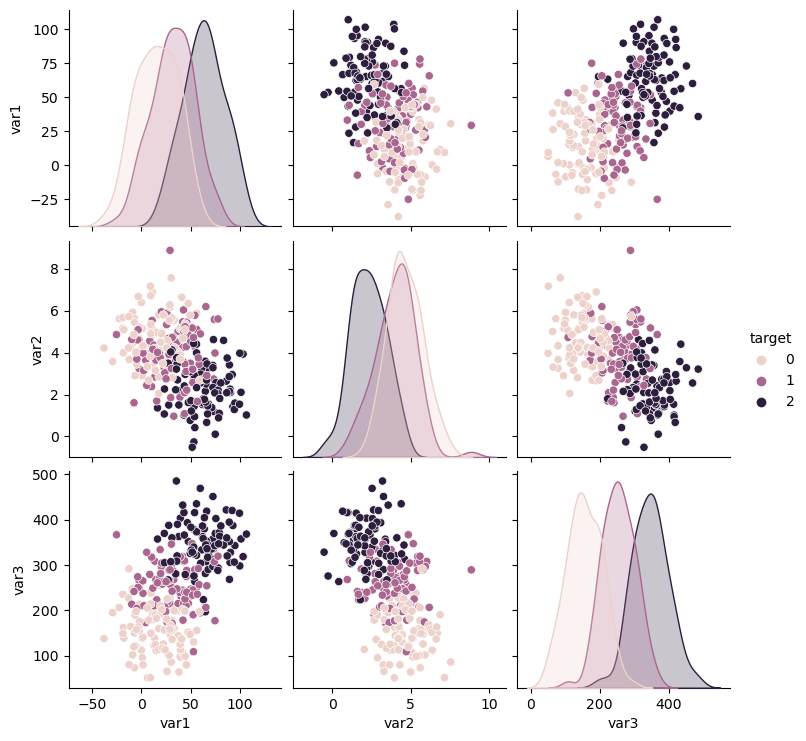

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pair plot
sns.pairplot(train_data, kind="scatter", hue="target")
plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [459]:
from sklearn.linear_model import LogisticRegression

# Training Logistic Regression using one-vs.-rest (OvR) technique
ovr_lr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
ovr_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [460]:
# Training Logistic Regression using multinomial technique
multi_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [461]:
# Evaluation of mean accuracy of Logistic Regression models

multinomial_lr_accuracy = multi_lr.score(X_test, y_test)
print("Mean accuracy of Logistic Regression (multinomial):", multinomial_lr_accuracy)


ovr_lr_accuracy = ovr_lr.score(X_test, y_test)
print("Mean accuracy of Logistic Regression (OvR):", ovr_lr_accuracy)

Mean accuracy of Logistic Regression (multinomial): 0.9
Mean accuracy of Logistic Regression (OvR): 0.8


#### Using gridsearch to tune the C value and multi class

In [462]:
# Define the parameter grid
params = {
    'C': np.logspace(-10, 10, 7),
    'multi_class': ['multinomial', 'ovr']
}
grid_search_clf = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), params, cv=5)

# Data training
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['multinomial', 'ovr']})

In [463]:
print("Tuned Hyperparameters:", grid_search_clf.best_params_)
print("Accuracy:", grid_search_clf.best_score_)

Tuned Hyperparameters: {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy: 0.825925925925926


#### Comment on why one multi_class technique was better than the other

The 'multinomial' multi-class technique resulted in higher accuracy compared to 'ovr'. Therefore, it was better.

#### Create LR with the best params

In [465]:
# Instantiate Logistic Regression with the best params
multi_lr = LogisticRegression(**grid_search_clf.best_params_, solver='lbfgs', max_iter=1000)

#### Visualize the decision boundaries

/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


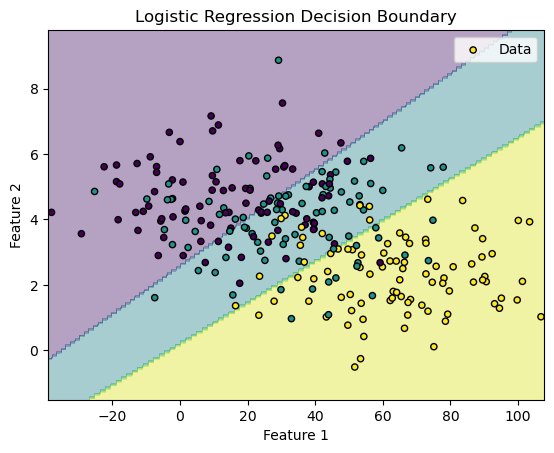

In [481]:
import numpy as np
import matplotlib.pyplot as plt

# This function plots decision regions
# @param X - dataframe
# @param y - labels
def plot_decision_regions(X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = multi_lr.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', label='Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()

# Fit logistic regression model to 2D training data
X_train_2d = X_train[['var1', 'var2']]
multi_lr.fit(X_train_2d, y_train)

# Plot decision regions
plot_decision_regions(X_train_2d.values, y_train.values)

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

In my opinion based on decision boundary, this model is not good because there are a lot of misclassified data and boundary separates the classes not effectively.